In [3]:
#importing libraries and reading the data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('C:/Users/prash/Desktop/python materials/python_data_projects/project_IPL_analysis/delivery.csv')

In [4]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


Best batsman - most runs

In [5]:
most_runs=df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

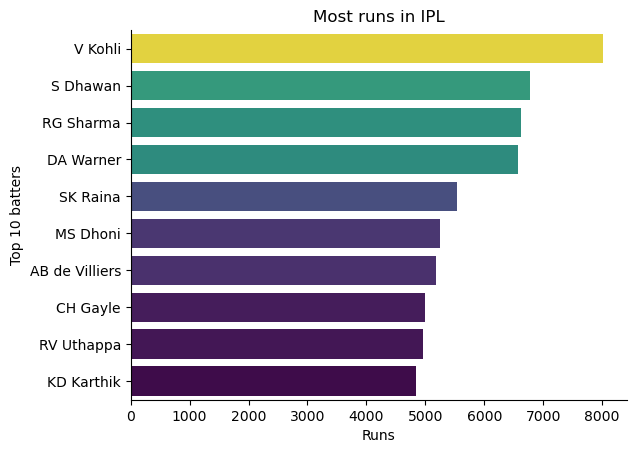

In [67]:
sns.barplot(x=most_runs.values,y=most_runs.index,hue=most_runs.values,palette='viridis')
plt.xlabel('Runs')
plt.ylabel('Top 10 batters')
plt.legend().remove()
plt.title('Most runs in IPL')
sns.despine()

Best batsman- best average

- Average is [total runs / dismissals]
- Condition: minimum total runs: 2500

In [61]:
dismissal_counts=df['player_dismissed'].value_counts()
dismissal_counts=dismissal_counts.to_frame()
dismissal_counts.reset_index(inplace=True)
dismissal_counts

,player_dismissed,count
0,RG Sharma,223
1,V Kohli,207
2,S Dhawan,193
3,KD Karthik,184
4,RV Uthappa,180
...,...,...
624,Vivrant Sharma,1
625,A Nel,1
626,VS Yeligati,1
627,H Das,1


In [62]:
most_runs_criteria= df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False)
most_runs_criteria=most_runs_criteria[most_runs_criteria>2500]
most_runs_criteria=most_runs_criteria.to_frame()
most_runs_criteria.reset_index(inplace=True)
most_runs_criteria

,batter,batsman_runs
0,V Kohli,8014
1,S Dhawan,6769
2,RG Sharma,6630
3,DA Warner,6567
4,SK Raina,5536
5,MS Dhoni,5243
6,AB de Villiers,5181
7,CH Gayle,4997
8,RV Uthappa,4954
9,KD Karthik,4843


In [63]:
most_runs_criteria=most_runs_criteria.merge(dismissal_counts,left_on='batter',right_on='player_dismissed',how='left')
most_runs_criteria.drop(columns='player_dismissed',axis=1,inplace=True)

In [64]:
most_runs_criteria

,batter,batsman_runs,count
0,V Kohli,8014,207
1,S Dhawan,6769,193
2,RG Sharma,6630,223
3,DA Warner,6567,164
4,SK Raina,5536,171
5,MS Dhoni,5243,134
6,AB de Villiers,5181,130
7,CH Gayle,4997,126
8,RV Uthappa,4954,180
9,KD Karthik,4843,184


In [68]:
most_runs_criteria['average']=most_runs_criteria['batsman_runs']/most_runs_criteria['count']
top10_avg=most_runs_criteria.sort_values(by='average',ascending=False).head(10)

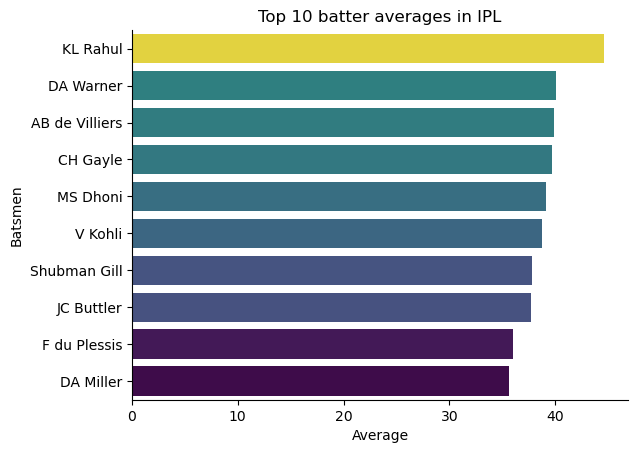

In [72]:
sns.barplot(data=top10_avg,x='average',y='batter',hue='average',palette='viridis')
plt.legend().remove()
plt.xlabel('Average')
plt.ylabel('Batsmen')
plt.title('Top 10 batter averages in IPL')
sns.despine()
plt.show()

Best batsman - strike rate

- Strike rate = (runs/balls played)*100